# Pandas

In [1]:
import pandas as pd
import yfinance as yf


In [2]:
inicio= '2017-01-01'
dados_weg = yf.download('WEGE3.SA', start= inicio)['Adj Close']
dados_weg

[*********************100%%**********************]  1 of 1 completed


Date
2017-01-02     5.237007
2017-01-03     5.500592
2017-01-04     5.368797
2017-01-05     5.354924
2017-01-06     5.400013
                ...    
2023-10-06    34.799999
2023-10-09    34.849998
2023-10-10    35.299999
2023-10-11    35.169998
2023-10-13    34.740002
Name: Adj Close, Length: 1690, dtype: float64

In [3]:
#retorno diário (%)
#valor atual / valor anterior
dados_weg.pct_change()

Date
2017-01-02         NaN
2017-01-03    0.050331
2017-01-04   -0.023960
2017-01-05   -0.002584
2017-01-06    0.008420
                ...   
2023-10-06   -0.005146
2023-10-09    0.001437
2023-10-10    0.012913
2023-10-11   -0.003683
2023-10-13   -0.012226
Name: Adj Close, Length: 1690, dtype: float64

In [5]:
#retorno anual
dados_weg.resample('Y').last().pct_change().dropna()

Date
2018-12-31   -0.037392
2019-12-31    1.007020
2020-12-31    1.202823
2021-12-31   -0.119122
2022-12-31    0.188505
2023-12-31   -0.085060
Freq: A-DEC, Name: Adj Close, dtype: float64

In [9]:
#definindo janela de retorno de 36 meses para analise

dias = 252 * 3
dados_36m = dados_weg.pct_change(periods= dias).dropna()
#está sendo aplica no df com dados diários, passando um periodo no pct_change
#para cada dia está sendo feito um pct_change com o valor do 756 dia anterior
dados_36m

Date
2020-01-14    2.174658
2020-01-15    2.042391
2020-01-16    2.173703
2020-01-17    2.264422
2020-01-20    2.336567
                ...   
2023-10-06    0.125824
2023-10-09    0.165684
2023-10-10    0.144302
2023-10-11    0.144346
2023-10-13    0.154180
Name: Adj Close, Length: 934, dtype: float64

<Axes: xlabel='Date'>

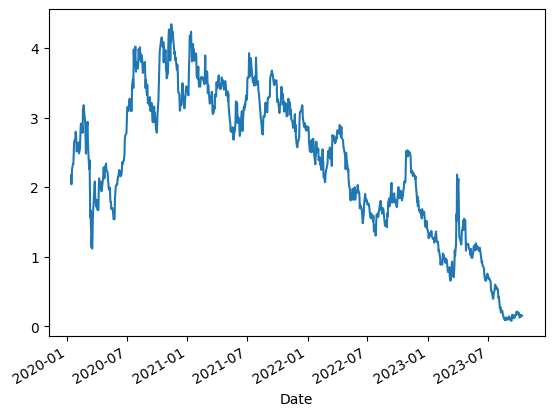

In [10]:
dados_36m.plot()

In [16]:
dados_mercado = yf.download(['^BVSP', 'WEGE3.SA'], start = inicio)['Adj Close']
dados_mercado.tail(5)

[*********************100%%**********************]  2 of 2 completed


,WEGE3.SA,^BVSP
Date,,
2023-10-06,34.799999,114170.000000
2023-10-09,34.849998,115156.000000
2023-10-10,35.299999,116737.000000
2023-10-11,35.169998,117051.000000
2023-10-13,34.720001,115934.398438


In [18]:
dados_36m = dados_mercado.pct_change(periods=dias).dropna()
dados_36m

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14548\1122202408.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  dados_36m = dados_mercado.pct_change(periods=dias).dropna()


,WEGE3.SA,^BVSP
Date,,
2020-01-14,2.174656,0.974056
2020-01-15,2.042392,0.883295
2020-01-16,2.173702,0.894884
2020-01-17,2.264421,0.908750
2020-01-20,2.336569,0.927544
...,...,...
2023-10-06,0.125824,0.173454
2023-10-09,0.165684,0.202862
2023-10-10,0.144302,0.203325


<Axes: xlabel='Date'>

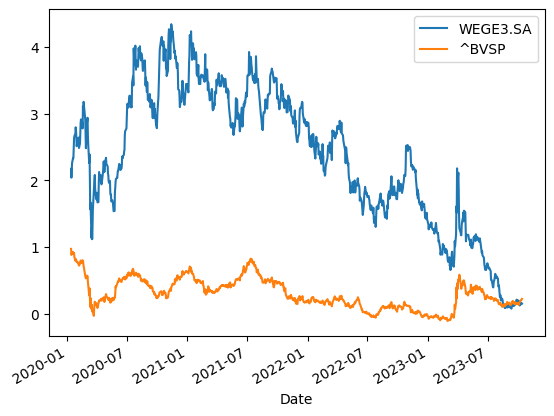

In [19]:
dados_36m.plot()

## Desafio aula

In [33]:
dados_36m['Superou CDB'] = dados_36m['WEGE3.SA'] > dados_36m['^BVSP']
porc_superou = len(dados_36m[dados_36m['Superou CDB'] == True ] ) / len(dados_36m)
print(f'WEGE3.SA ficou com o valor de retorno de 36M superior ao do bovespa em {porc_superou} vezes')

dados_36m

WEGE3.SA ficou com o valor de retorno de 36M superior ao do bovespa em 0.9668094218415417 vezes


,WEGE3.SA,^BVSP,Superou CDB
Date,,,
2020-01-14,2.174656,0.974056,True
2020-01-15,2.042392,0.883295,True
2020-01-16,2.173702,0.894884,True
2020-01-17,2.264421,0.908750,True
2020-01-20,2.336569,0.927544,True
...,...,...,...
2023-10-06,0.125824,0.173454,False
2023-10-09,0.165684,0.202862,False
2023-10-10,0.144302,0.203325,False


## Desafio

In [39]:
empresa = 'PETZ3.SA'
df_empresa = yf.download(empresa)['Adj Close']
df_bvsp = yf.download('^BVSP')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [41]:
df_empresa_bvsp = pd.merge(df_empresa, df_bvsp, how='left', left_on='Date', right_on='Date')
df_empresa_bvsp.columns = ['PETZ3', 'BVSP']
df_empresa_bvsp

,PETZ3,BVSP
Date,,
2020-09-15,15.355687,100298.000000
2020-09-16,15.306155,99676.000000
2020-09-17,15.454758,100098.000000
2020-09-18,15.098109,98290.000000
2020-09-21,14.810809,96991.000000
...,...,...
2023-10-06,4.150000,114170.000000
2023-10-09,4.180000,115156.000000
2023-10-10,4.260000,116737.000000


In [43]:
print('retorno diario')
df_empresa_bvsp.pct_change().dropna()

retorno diario


,PETZ3,BVSP
Date,,
2020-09-16,-0.003226,-0.006202
2020-09-17,0.009709,0.004234
2020-09-18,-0.023077,-0.018062
2020-09-21,-0.019029,-0.013216
2020-09-22,0.036789,0.003124
...,...,...
2023-10-06,-0.050343,0.007821
2023-10-09,0.007229,0.008636
2023-10-10,0.019139,0.013729


In [44]:
print('retorno anual')
df_empresa_bvsp.resample('Y').last().pct_change().dropna()

,PETZ3,BVSP
Date,,
2021-12-31,-0.141105,-0.121402
2022-12-31,-0.616516,0.049694
2023-12-31,-0.370531,0.052013


In [50]:
df_empresa_bvsp['PETZ3 12M / Dia'] = df_empresa_bvsp['PETZ3'].pct_change(periods=252)
df_empresa_bvsp['BVSP 12M / Dia'] = df_empresa_bvsp['BVSP'].pct_change(periods=252)
df_empresa_bvsp

,PETZ3,BVSP,PETZ3 12M / Dia,BVSP 12M / Dia
Date,,,,
2020-09-15,15.355687,100298.000000,NaN,NaN
2020-09-16,15.306155,99676.000000,NaN,NaN
2020-09-17,15.454758,100098.000000,NaN,NaN
2020-09-18,15.098109,98290.000000,NaN,NaN
2020-09-21,14.810809,96991.000000,NaN,NaN
...,...,...,...,...
2023-10-06,4.150000,114170.000000,-0.617991,-0.017723
2023-10-09,4.180000,115156.000000,-0.606575,-0.017424
2023-10-10,4.260000,116737.000000,-0.608583,-0.007009


<Axes: xlabel='Date'>

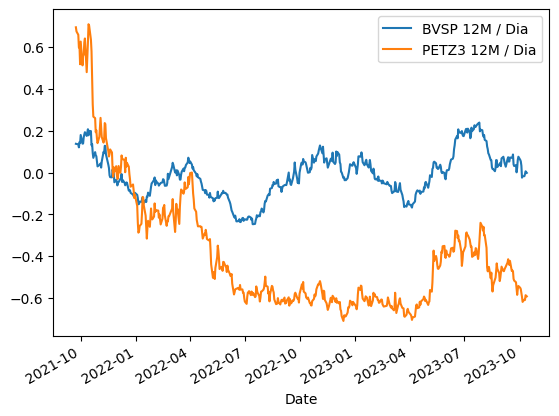

In [56]:
#df só com dados do retorno anual diario para plotar
df_empresa_bvsp[['BVSP 12M / Dia', 'PETZ3 12M / Dia']].dropna().plot()